In [15]:
from pymatgen.io.lammps.outputs import parse_lammps_log
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
control_path = "monte-carlo-test/mc_batch_testing/control/"

In [12]:
# mc_thermo = parse_lammps_log("monte-carlo-test/biased_mc_test/simplified_mc.log")
mc_thermo = parse_lammps_log("monte-carlo-test/mc_batch_testing/control/simplified_mc.log")
# data_parm = parse_lammps_log("lammpsdata_test/oleic_xligand.test.log")
# lammps_mol = parse_lammps_log("lammpsmol_test/combined_mc.log")

In [13]:
len(mc_thermo)

5

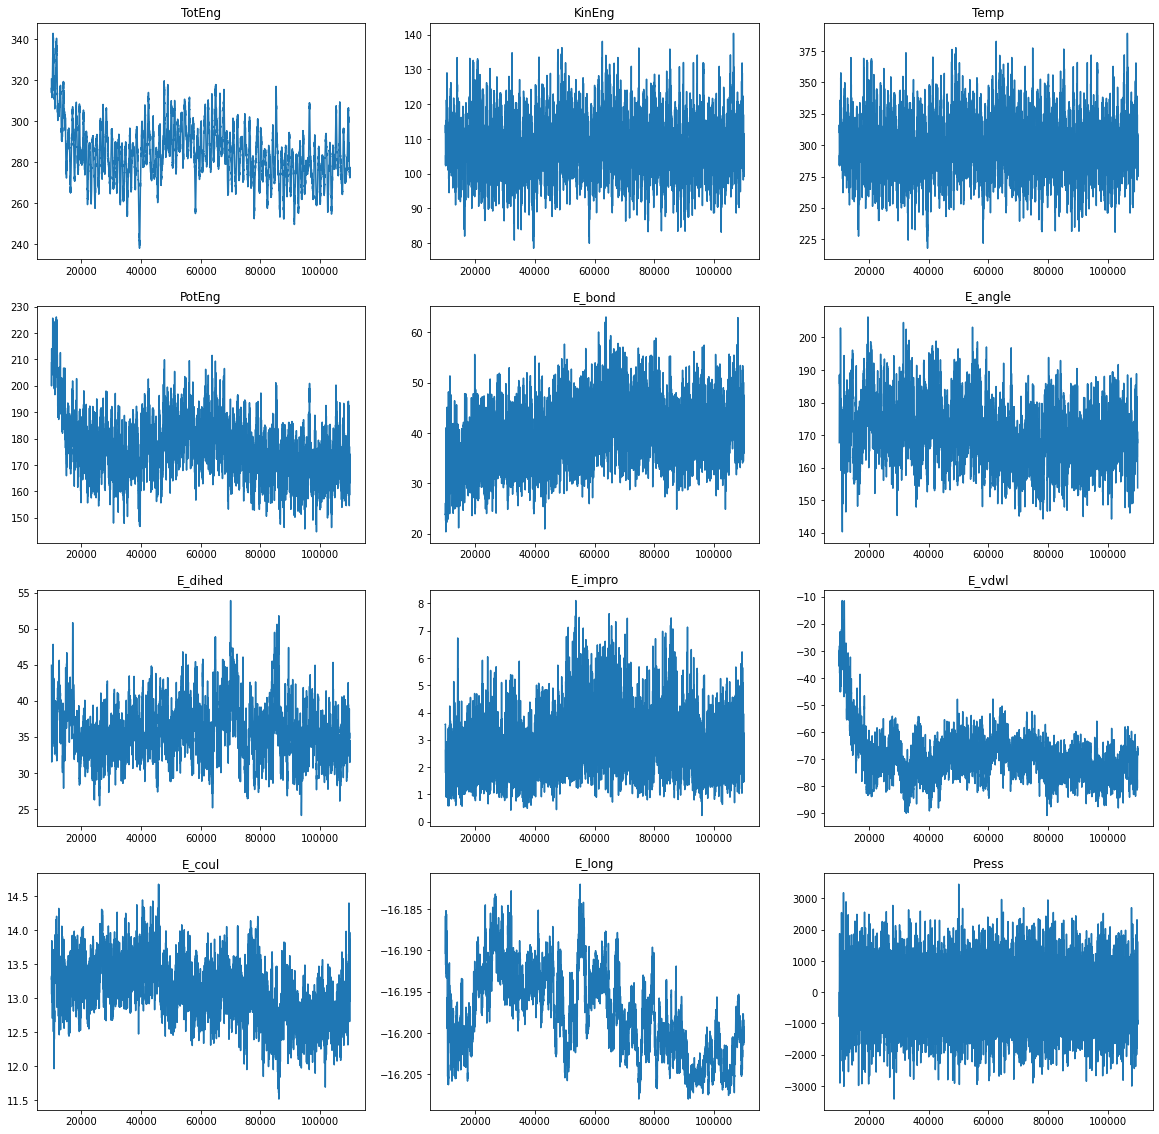

In [14]:
fig, axs = plt.subplots(4,3, figsize=(20,20))
dat = mc_thermo[4].columns[1:]
x = mc_thermo[4]['Step']

for prop,ax in zip(dat, axs.ravel()):
    ax.set_title(prop)
    ax.plot(x,mc_thermo[4][prop])
    
plt.show()

In [7]:
mc_thermo[3].columns

Index(['Step', 'TotEng', 'KinEng', 'Temp', 'PotEng', 'E_bond', 'E_angle',
       'E_dihed', 'E_impro', 'E_vdwl', 'E_coul', 'E_long', 'Press'],
      dtype='object')

In [19]:
import MDAnalysis as mda
# from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory
import numpy.linalg

In [31]:
system = mda.Universe("monte-carlo-test/struct_file/oleic_xlig.mol2", f"monte-carlo-test/mc_batch_testing/control/simplified_mc.simple_mc.lammpsdump")

In [32]:
system.trajectory

<DumpReader monte-carlo-test/mc_batch_testing/control/simplified_mc.simple_mc.lammpsdump with 10001 frames of 122 atoms>

In [50]:
xlig = system.atoms[0:68]
oleic = system.atoms[68:]

In [53]:
for at in xlig:
    print(at.type)

C.3
C.3
C.3
N.pl3
C.1
C.1
C.1
C.1
C.2
O.2
C.1
C.1
C.1
C.1
S.3
C.3
C.3
C.3
C.3
C.3
C.3
C.3
C.3
C.3
C.3
S.3
C.1
C.1
C.1
C.1
C.3
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H
H


Define orientation vectors for the two molecules? This data should actually be extractable from lammps in theory since it's being controlled by the montecarlo fix...

As a proxy, define it as the vector between first and last heavy atom of the molecule?

In [57]:
xlig_vectors = []
oleic_vectors = []
for ts in system.trajectory:
    vector1 = xlig[-1].position - xlig[0].position
    xlig_vectors.append(vector1)
    vector2 = oleic[-1].position - oleic[0].position
    oleic_vectors.append(vector2)

In [58]:
xlig_vectors[0:20]

[array([-1.9249992 ,  0.02885097,  1.01861   ], dtype=float32),
 array([-1.9336605 , -0.01056004,  0.9899502 ], dtype=float32),
 array([-1.8840408 ,  0.03724003,  1.0859003 ], dtype=float32),
 array([-1.9473906 , -0.16000101,  0.9617996 ], dtype=float32),
 array([-1.8561401 ,  0.04260498,  1.1896    ], dtype=float32),
 array([-1.4933996e+00, -2.0003319e-04,  1.6130991e+00], dtype=float32),
 array([-1.3418608 ,  0.37345982,  1.6994    ], dtype=float32),
 array([-1.7515101 ,  0.22093987,  1.2540007 ], dtype=float32),
 array([-1.5407906 ,  0.60415006,  1.4190998 ], dtype=float32),
 array([-1.5480504 ,  0.52050996,  1.4369001 ], dtype=float32),
 array([-1.9430299 ,  0.60483   ,  0.79629993], dtype=float32),
 array([-1.1215897 ,  0.63827014,  1.7395    ], dtype=float32),
 array([-1.5110102,  0.57953  ,  1.3863001], dtype=float32),
 array([-1.5258098,  0.7114501,  1.3815994], dtype=float32),
 array([-1.1399393,  0.8060298,  1.7181997], dtype=float32),
 array([-1.4484401,  0.94733  ,  1.43319

In [29]:
for i in test.atoms:
    print(i)

<Atom 1: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 2: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 3: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 4: N of type N.pl3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 5: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 6: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 7: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 8: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 9: C of type C.2 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 10: O of type O.2 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 11: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 12: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 13: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 14: C of type C.1 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 15: S of type S.3 of resname UNL1, resid 1 and segid SYSTEM>
<A